# Práctica 9: Visión por computador I

Objetivos:
- Utilizar las distintas técnicas de visión por computador vistas en teoría.
- Dar los primeros pasos con la librería OpenCV.

Además de este notebook tienes dos ejercicios adicionales para esta práctica.
    
## Pasos previos
En esta práctica y en las siguientes vamos a usar de forma intensiva la librería [OpenCV](http://opencv.org/). Así que el primer paso es cargar dicha. Además cargamos otras librerías que serán útiles en esta práctica.

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Además vamos a necesitar descargar y descomprimir un conjunto de imágenes que utilizaremos a lo largo de la práctica usando los siguientes comandos. 

In [3]:
!wget www.unirioja.es/cu/joheras/ia/p9/imágenes.zip
!unzip imágenes.zip

--2018-04-23 09:29:29--  http://www.unirioja.es/cu/joheras/ia/p9/im%C3%A1genes.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 282251 (276K) [application/zip]
Saving to: ‘imágenes.zip.1’

imágenes.zip.1      100%[===================>] 275.64K   113KB/s    in 2.4s    

2018-04-23 09:29:32 (113 KB/s) - ‘imágenes.zip.1’ saved [282251/282251]

Archive:  imágenes.zip
replace imágenes/tornillos.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## Cargando, mostrando y guardando imágenes

El primer paso para analizar una imagen consiste en cargar dicha imagen. Para cargar una imagen utilizamos el método `imread` de OpenCV y el resultado de invocar a dicha función lo guardamos en una variable que va a ser un array multidimensional.

In [0]:
image = cv2.imread("imágenes/gato.jpg")

Podemos acceder a las propiedades de la imagen con los siguientes comandos:

In [4]:
print "altura: %d píxeles" % (image.shape[1])

altura: 518 píxeles


In [5]:
print "anchura: %d píxeles" % (image.shape[0])

anchura: 518 píxeles


In [6]:
print "canales: %d" % (image.shape[2])

canales: 3


Si estuvieramos creando un programa ejecutable desde la línea de comandos, utilizaríamos la instrucción `imshow` de OpenCV y esto nos mostraría una ventana con la imagen que le pasamos como parámetro. Por ejemplo:

```python
cv2.imshow("Gato", image)
cv2.waitKey(0)
```

Mostraría una ventana llamada "Gato" con la imagen que hemos cargado anteriormente almacenada en la variable `image`. Posteriormente llamamos a `cv2.waitKey(0)` que sirve para que el usuario pulse cualquier tecla, de lo contrario la ventana de la imagen se abre y se cierra. 

Sin embargo, la instrucción `imshow` no funciona en los notebooks, así que vamos a utilizar una función auxiliar llamada `mostrarImagen` que recibe como parámetro la imagen a mostrar. 


In [0]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()
        

Para mostrar una imagen sólo tenemos que invocar a dicha función.

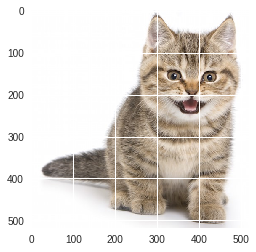

In [8]:
mostrarImagen(image)

Para guardar una imagen utilizamos la función imwrite pasándole la imagen a guardar y el path (notar que también tenemos que dar el formato).

In [9]:
cv2.imwrite("imágenes/gato.png",image)

True

Comprueba que al ejecutar el comando anterior una nueva imagen ha aparecido en la carpeta imágenes.

In [10]:
!ls imágenes/

basic_shapes.png	  gato.png	     sudoku2.png	tornillos.png
contours_convex_hull.jpg  more_shapes.png    sudoku3.png	ur.jpeg
contours_tictactoe.png	  playa-paraiso.jpg  tetris_blocks.png
gato.jpg		  sudoku1.png	     thresh.png


##### Ejercicio
Carga la imagen ur.jpeg, almacenalá en la variable ur, y a continuación muestra su información de altura, anchura y canales.

In [0]:
ur = cv2.imread("imágenes/ur.jpeg")

## Accediendo a los píxeles de una imagen

OpenCV representa las imágenes utilizando vectores de Numpy que utilizan la representación de matriz que hemos visto en teoría. En concreto, se almacena una matriz por canal (así que una imagen RGB tendrá 3 canales y una imagen en escala de grises tendrá 1).

Una cuestión importante es que en OpenCV el orden de los canales de las imágenes RGB no es red-green-blue, sino blue-green-red.

Para acceder a los píxeles de la imagen utilizamos la notación de numpy

In [12]:
(b,g,r) = image[0,0]
print "Píxel en (0, 0) - Rojo: {r}, Verde: {g}, Azul: {b}".format(r=r, g=g, b=b)

Píxel en (0, 0) - Rojo: 254, Verde: 254, Azul: 254


De manera similar podemos cambiar el valor de un píxel.

In [13]:
image[0,0] = (0,0,255)
(b,g,r) = image[0,0]
print "Píxel en (0, 0) - Rojo: {r}, Verde: {g}, Azul: {b}".format(r=r, g=g, b=b)

Píxel en (0, 0) - Rojo: 255, Verde: 0, Azul: 0


##### Ejercicio

¿Cuál es el color RGB del "rojo" de la UR?

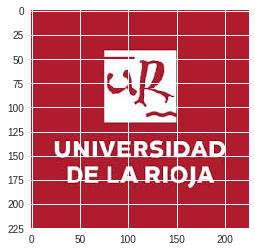

Píxel en (0, 0) - Rojo: 176, Verde: 27, Azul: 46


In [17]:
mostrarImagen(ur)
(b,g,r) = ur[0,0]
print "Píxel en (0, 0) - Rojo: {r}, Verde: {g}, Azul: {b}".format(r=r, g=g, b=b)

## Procesamiento básico de imágenes

A continuación vamos a ver distintas técnicas de procesado de imágenes. 

### Traslación

Para trasladar una imagen debemos dar una matrix Numpy de la forma
[[1, 0, traslacionX], [0, 1, traslacionY]]

En concreto los valores de traslacionX y traslacionY indican respectivamente
el número de píxeles que queremos trasladar la imagen en la dirección X 
(valor positivo, traslada la imagen hacia la izquierda; valor negativo, 
traslada la imagen hacia la derecha), y el número de píxeles que queremos 
trasladar en el eje Y (valor positivo, traslada la imagen hacia abajo,
valor negativo traslada la imagen hacia arriba).

Por ejemplo si queremos trasladar la imagen inicial 25 píxeles a la derecha y 50 hacia abajo procederíamos del siguiente modo. Comenzamos definiendo la matriz de translación.

In [0]:
M = np.float32([[1, 0, 25], [0, 1, 50]])

Aplicamos la siguiente función que es la que produce la translación.

In [0]:
trasladada = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

Mostramos la imagen.

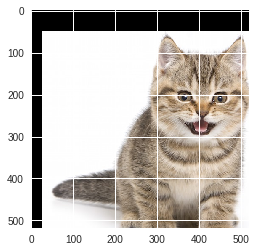

In [20]:
mostrarImagen(trasladada)

##### Ejercicio
Traslada la imagen original almacenada en imagen 30 píxeles hacia arriba y 20 hacia la derecha, almacena el resultado en la variable trasladada2, y muestra el resultado.

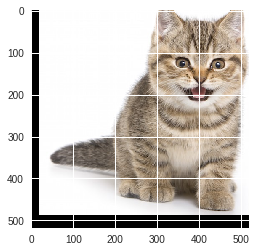

In [22]:
M2 = np.float32([[1, 0, 20], [0, 1, -30]])
trasladada2 = cv2.warpAffine(image, M2, (image.shape[1], image.shape[0]))
mostrarImagen(trasladada2)

### Rotación
Veamos ahora cómo rotar una imagen alrededor de su centro. Para ello el primer paso consiste en obtener las dimensiones de la imagen y calcular su centro.

In [0]:
(h, w) = image.shape[:2]
(cX, cY) = (w / 2, h / 2)

En este ejemplo veremos como rotar la imagen 45 grados. Para ello  construimos primero la matriz vista en clase usando la función `getRotationMatrix2D` a la cual le pasamos el punto de rotación, el ángulo (sentido horario positivo, sentido antihorario valor negativo) y el escalado (si no queremos que la imagen se escale usar el valor 1.0).

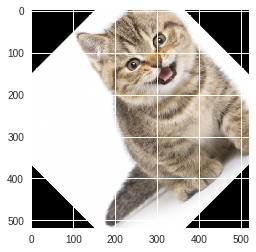

In [24]:
M3 = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotada = cv2.warpAffine(image, M3, (w, h))
mostrarImagen(rotada)

##### Ejercicio
 Rota la imagen almacenada en imagen 30 grados en sentido antihorario, sin
 escalado y utilizando como punto de rotación el centro de la imagen. 
Almacena el resultado en la variable rotada2, y muestra el resultado.

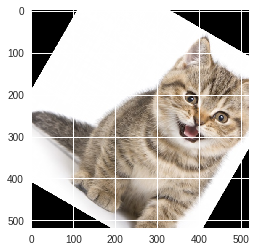

In [25]:
M4 = cv2.getRotationMatrix2D((cX, cY), -30, 1.0)
rotada2 = cv2.warpAffine(image, M4, (w, h))
mostrarImagen(rotada2)

### Escalado

Para el escalado de imágenes utilizamos el método resize pasándole como 
parámetros la imagen original y las nuevas dimensiones. Recordad que al 
escalar una imagen es muy importante tener en cuenta la relación de aspecto.

 Veamos primero que ocurre si no tenemos en cuenta la relación de aspecto.

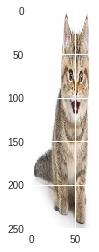

In [26]:
escaladaSinRelacionAspecto = cv2.resize(image,(70,250))
mostrarImagen(escaladaSinRelacionAspecto)

Como podemos ver la imagen tiene un aspecto raro. Veámos ahora como hacer
que nuestra imagen tenga un alto de 150 manteniendo la relación de aspecto.

In [0]:
r = 150.0 /image.shape[1]
dim = (150,int(image.shape[0]*r))

Daros cuenta que en el método anterior los valores de alto y ancho están
invertidos con respecto a cómo los obtenemos con el comando shape.

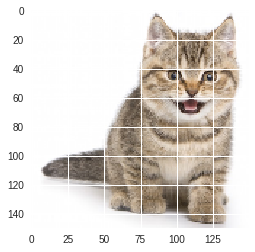

In [28]:
escaladaBien = cv2.resize(image, dim)
mostrarImagen(escaladaBien)

En el método resize también podemos indicar el método de interpolación. En OpenCV están disponibles los siguientes métodos: `cv2.INTER_AREA` (usado por defecto), `cv2.INTER_LINEAR`, `cv2.INTER_CUBIC` y `cv2.INTER_LANCZOS4`.

A continuación se muestra cómo se puede reducir a la mitad el tamaño de la imagen usando el método de interpolación cúbica. Comenzamos calculando las dimensiones de la imagen.

In [0]:
dim = (int(image.shape[1]/ 2),int(image.shape[0]/2))

Escalamos la imagen.

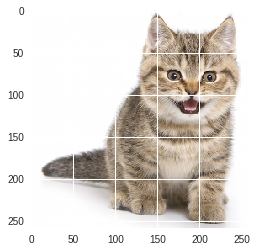

In [30]:
escaladaMitadCubica = cv2.resize(image, dim,interpolation=cv2.INTER_CUBIC)
mostrarImagen(escaladaMitadCubica)

##### Ejercicio

 Escala la imagen del gato a un 130% utilizando el método de interpolación
lineal. Almacena el resultado en la variable escalada130 y muestra el resultado.

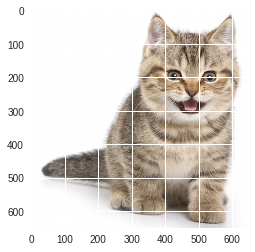

In [34]:
r2 = 650.0 /image.shape[1]
dim2 = (650,int(image.shape[0]*r2))
escalada130 = cv2.resize(image, dim2,interpolation=cv2.INTER_LINEAR)
mostrarImagen(escalada130)

### Volteado

Para el volteado de una imagen utilizamos el método flip, el cual recibe 
como parámetros la imagen original y uno de los siguientes valores:
1 para volteado horizontal, 0 para volteado vertical, y -1 para volteado
horizontal y vertical).

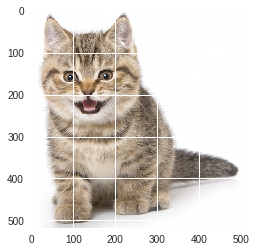

In [35]:
volteadoH = cv2.flip(image, 1)
mostrarImagen(volteadoH)

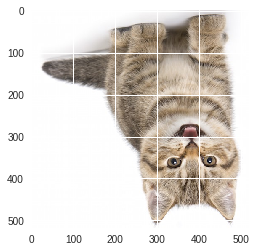

In [36]:
volteadoV = cv2.flip(image, 0)
mostrarImagen(volteadoV)

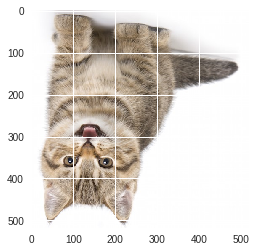

In [37]:
volteadoHV = cv2.flip(image, -1)
mostrarImagen(volteadoHV)

### Recorte

El recorte se puede lograr utilizando la funciónalidad de slicing de los
vectores numpy. En concreto, usando la siguiente sintaxis:
`image[comienzoY:finY,comienzoX:finX]`.

Por ejemplo para quedarnos con la cara del gato en la imagen almacenada en
imagen, podemos proceder del siguiente modo.

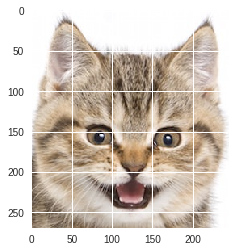

In [39]:
cara = image[0:270,255:500]
mostrarImagen(cara)

Para determinar los valores anteriores, se puede utilizar un programa como
GIMP. Sin embargo esto en general no es factible si estamos trabajando 
con muchas imágenes, en cuyo caso habría que crear un programa para 
detectar caras.  

##### Ejercicio

Prueba a hacer distintos recortes de las imágenes.

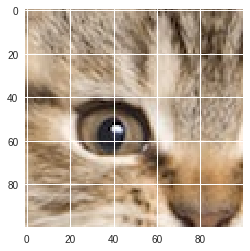

In [42]:
ojo = image[100:200,300:400]
mostrarImagen(ojo)

### Mascaras

Las máscaras sirven para centrarnos en regiones de interés dentro de
una imagen. Por ejemplo, en la imagen del gato podemos recortar dicha
imagen para centrarnos en la cara como hemos hecho en el apartado
anterior, pero también podemos usar máscaras.

Las máscaras deben tener el mismo tamaño que la imagen original, pero
sólo se utilizan dos valores, 0 y 255, para los píxeles. Los píxeles con un
valor de 0 se ignoran en la imagen original y los píxeles de la máscara
con un valor de 255 se mantienen. Por ejemplo, vamos a construir una
máscara que sólo muestre la cara del gato.

Creamos una imagen que tiene las dimensiones de la imagen del gato pero 
donde todos sus píxeles tienen el valor 0 y la almacenamos en la variable
`mask`. 

In [0]:
mask = np.zeros(image.shape[:2],dtype="uint8")

Dibujamos un rectángulo blanco en la zona de la cara del gato. 

In [44]:
cv2.rectangle(mask,(270,0),(500,255),255,-1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Mostramos la imagen de la máscara. 

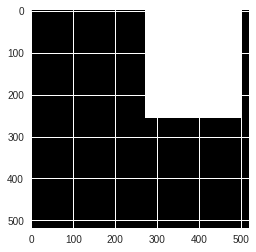

In [45]:
mostrarImagen(mask)

Aplicamos la máscara utilizando la operación binaria `and`.

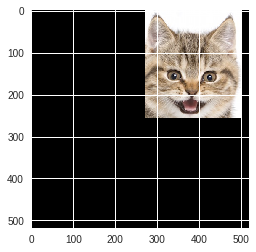

In [46]:
masked = cv2.bitwise_and(image, image, mask=mask)
mostrarImagen(masked)

También se pueden construir máscaras circulares utilizando la función circle. 

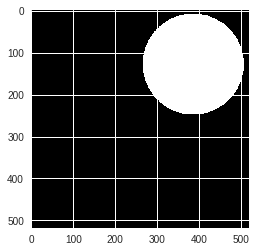

In [47]:
mask = np.zeros(image.shape[:2],dtype="uint8")
cv2.circle(mask,(385,128),120,255,-1)
mostrarImagen(mask)

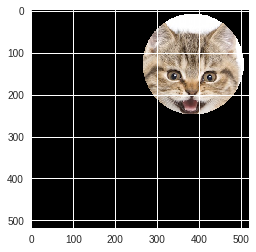

In [48]:
masked = cv2.bitwise_and(image, image, mask=mask)
mostrarImagen(masked)

##### Ejercicio

Crea una máscara rectangular para mostrar únicamente el texto Universidad
de La Rioja de la imagen ur, y una máscara circular para mostrar sólo el
cuadrado central. Utiliza GIMP para determinar la posición de las máscaras.

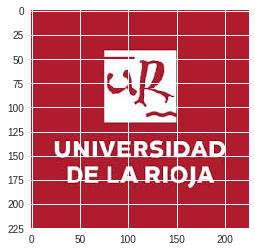

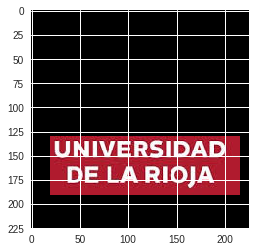

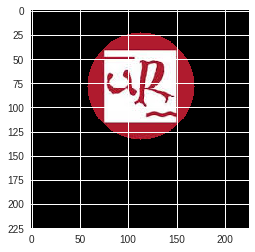

In [70]:
mostrarImagen(ur)
mask2 = np.zeros(ur.shape[:2],dtype="uint8")
cv2.rectangle(mask2,(20,130),(215,190),255,-1)
masked2 = cv2.bitwise_and(ur, ur, mask=mask2)
mostrarImagen(masked2)

mask3 = np.zeros(ur.shape[:2],dtype="uint8")
cv2.circle(mask3,(113,78),55,255,-1)
masked3 = cv2.bitwise_and(ur, ur, mask=mask3)
mostrarImagen(masked3)

## Espacios de color

La librería OpenCV proporciona la funcionalidad necesaria para trabajar con distintos espacios de color, incluyendo no solo los vistos en clase. Por defecto las imágenes se cargan en el espacio de color BGR.

Podemos separar los canales de una imagen utilizando el comando `split`.

In [0]:
(blue,green,red)=cv2.split(image)

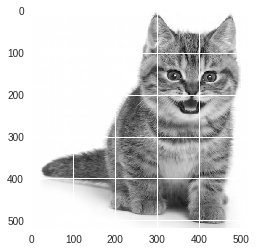

In [72]:
mostrarImagen(blue)

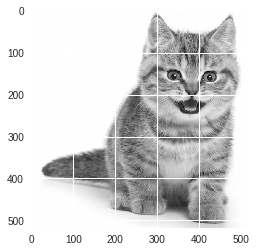

In [73]:
mostrarImagen(green)

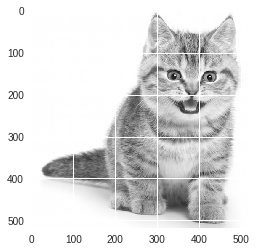

In [74]:
mostrarImagen(red)

Para cambiar de espacio de color utilizamos la función cv2.cvtColor. Por
ejemplo, para cambiar al espacio de color de escala de grises usaríamos
el siguiente comando:

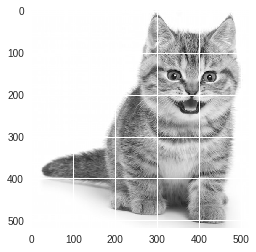

In [75]:
imageGrayScale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
mostrarImagen(imageGrayScale)

Si mostramos las dimensiones de la nueva imagen veremos que sólo tiene un canal.

In [76]:
imageGrayScale.shape

(518, 518)

##### Ejercicio

Convierte la imagen original del gato a los espacios de color HSV y L*a*b, almacena las imágenes de dichos espacios de color en las variables imageHSV e imageLAB respectivamente. Una vez hecho esto, separa los canales de cada una
de estas imágenes y almacenalos en las variables h,s y v para la imagen en el espacio de color HSV, y en las variables l, a, b para la imagen en L*a*b. Por último, muestra cada imagen.

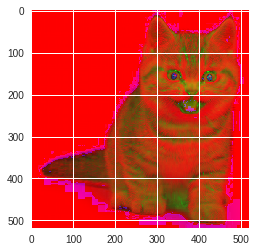

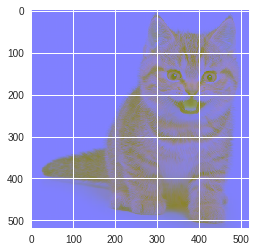

In [77]:
imageHSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mostrarImagen(imageHSV)

imageLAB = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)
mostrarImagen(imageLAB)

## Histogramas 

Por último vamos a ver cómo construir y visualizar histogramas. Lo primero que vamos a hacer es mostrar el histograma de una imagen en escala de grises. Para ello utilizamos la función `calcHist`. Esta función recibe como parámetros un array con la imagen a partir de la cual queremos generar nuestro histograma, un array con los canales que usamos para construir el histograma, una máscara, el número de bins, y los rangos de valores.

In [0]:
hist = cv2.calcHist([imageGrayScale],[0],None,[256],[0,256])

Si mostramos hist veremos que es un vector con 256 componentes.

In [79]:
hist

array([[0.0000e+00],
       [2.0000e+00],
       [3.0000e+00],
       [3.0000e+00],
       [1.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [0.0000e+00],
       [3.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [4.0000e+00],
       [3.0000e+00],
       [2.0000e+00],
       [6.0000e+00],
       [2.0000e+00],
       [1.0000e+00],
       [4.0000e+00],
       [6.0000e+00],
       [4.0000e+00],
       [0.0000e+00],
       [6.0000e+00],
       [4.0000e+00],
       [3.0000e+00],
       [1.0000e+01],
       [5.0000e+00],
       [1.3000e+01],
       [1.8000e+01],
       [1.2000e+01],
       [2.0000e+01],
       [1.5000e+01],
       [2.2000e+01],
       [1.8000e+01],
       [1.6000e+01],
       [2.0000e+01],
       [4.1000e+01],
       [4.0000e+01],
       [3.7000e+01],
       [4.0000e+01],
       [4.5000e+01],
       [3.7000e+01],
       [3.9000e+01],
       [4.8000e+01],
       [6.1000e+01],
       [4.8000e+01],
       [4.3000e+01],
       [5.700

Para visualizar el histograma nos creamos una figura utilizando la librería
matplotlib. Comenzamos creando una figura vacía.

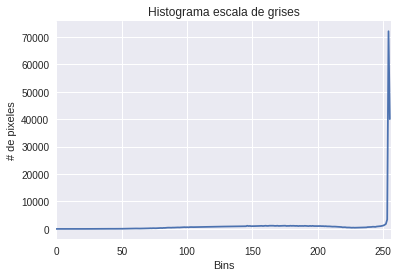

In [80]:
# Creamos una figura vacía.
plt.figure()
# Añadimos un título a la figura.
plt.title("Histograma escala de grises")
# Añadimos una etiqueta al eje de las X.
plt.xlabel("Bins")
# Añadimos una etiqueta al eje de las Y.
plt.ylabel("# de pixeles")
# Mostramos el histograma.
plt.plot(hist)
# Restringimos los valores de x al rango [0,255]
plt.xlim([0, 256])
# Mostramos el histograma. 
plt.show()

Si nos fijamos en el histograma anterior, podemos ver que hay un gran pico
de píxeles en el rango [240-255], esto es debido a que la imagen contiene
bastante fondo blanco.


 Podemos ver que el histograma que hemos generado es un histograma no
normalizado. Para generar el histograma normalizado debemos dividir cada
uno de los valores del array hist por la suma total de píxeles. 

In [0]:
histNorm = hist/hist.sum()

 Mostramos el histograma.

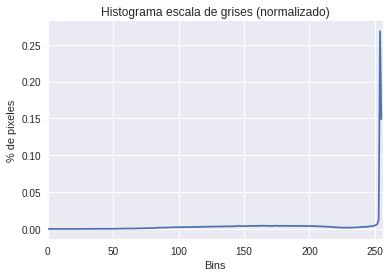

In [82]:
plt.figure()
plt.title("Histograma escala de grises (normalizado)")
plt.xlabel("Bins")
plt.ylabel("% de pixeles")
plt.plot(histNorm)
plt.xlim([0, 256])
plt.show()

Del mismo modo que podemos generar histogramas para imágenes en escala de grises,
también lo podemos hacer para imágenes a color.

La primera opción para hacer esto consiste en separar la imagen en los distintos
canales, y trabajar como hemos visto para el histograma en escala de grises.

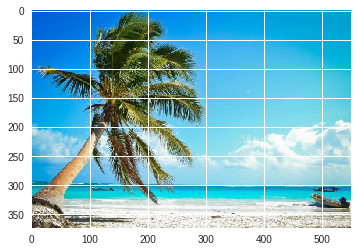

In [83]:
imagenPlaya = cv2.imread("imágenes/playa-paraiso.jpg")
mostrarImagen(imagenPlaya)

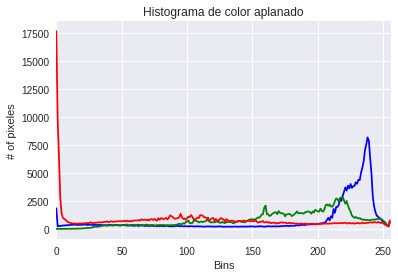

In [84]:
canales = cv2.split(imagenPlaya)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma de color aplanado")
plt.xlabel("Bins")
plt.ylabel("# of pixeles")

# loop over the image channels
for (canal, color) in zip(canales, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.show()

 Esta opción resulta útil para visualizar los histogramas. Sin embargo, y
como veremos en la siguiente práctica, puede resulta útil obtener los histogramas teniendo
en cuenta los tres canales de la imagen, es decir obtener histogramas multidimensionales.

Con estos histogramas lo que conseguimos representar son cosas como ¿cuántos
píxeles tienen valor rojo 10 y valor azul 40? ¿o cuántos píxeles tienen
valor rojo 10, verde 20, y azul 30?.

Para obtener dichos histogramas procedemos del siguiente modo. Suponed que queremos obtener
 un histograma de color 3D con 8 bins en cada dirección, para ello utilizaríamos la
siguiente llamada a la función `calcHist`.

In [0]:
histPlaya = cv2.calcHist([imagenPlaya],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])

Podemos a continuación normalizarlo y aplanarlo utilizando los métodos `normalize` y `flatten`. Notar que las versiones de OpenCV que hay en los ordenadores de la Universidad y en Google Drive no coinciden por lo que deberás comentar una de las siguientes instrucciones dependiendo del entorno en el que te encuentres.  

In [0]:
# Versión OpenCV 2 (ordenadores universidad)
# histPlaya = cv2.normalize(histPlaya).flatten()
# Versión OpenCV 3 (drive)
histPlaya = cv2.normalize(histPlaya,histPlaya).flatten()

 Por último, podemos centrarnos en una región de la imagen utilizando máscaras.
Para ello vamos a construir una imagen que será negra para todas las regiones
que queremos ignorar, y blanca para las regiones a examinar.

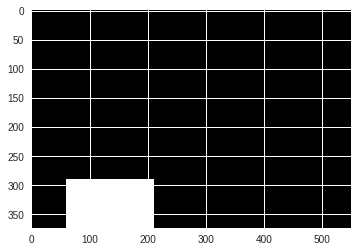

In [88]:
mask = np.zeros(imagenPlaya.shape[:2], dtype="uint8")
cv2.rectangle(mask,(60, 290), (210, 390), 255, -1)
mostrarImagen(mask)

##### Pregunta
¿Qué vemos con esta máscara?

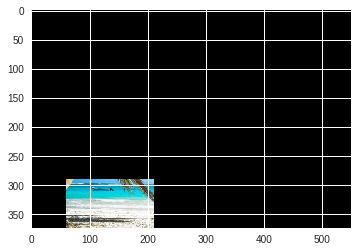

In [89]:
masked = cv2.bitwise_and(imagenPlaya, imagenPlaya, mask=mask)
mostrarImagen(masked)

# Vemos la sombra del arbol, arena y parte del agua

Ahora podríamos constuir el histograma de esa zona de interés usando la
siguiente instrucción.

In [0]:
histPlayaMascara = cv2.calcHist([imagenPlaya],[0,1,2],mask,[8,8,8],[0,256,0,256,0,256])

Al igual que antes, podemos a continuación normalizarlo y aplanarlo.

In [0]:
# Versión OpenCV 2 (ordenadores universidad)
# histPlayaMascara = cv2.normalize(histPlayaMascara).flatten()
# Versión OpenCV 3 (drive)
histPlayaMascara = cv2.normalize(histPlayaMascara,histPlaya).flatten()

##### Ejercicio

Utilizando la imagen de la UR, genera el histograma normalizado para cada
uno de los canales de dicha imagen utilizando 256 bins.
Da una interpretacion de dicho histograma.

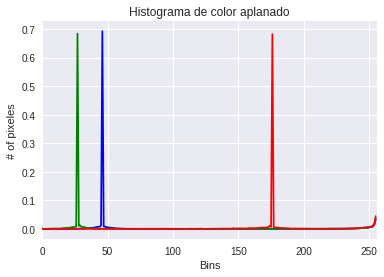

In [101]:
canales = cv2.split(ur)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma de color aplanado")
plt.xlabel("Bins")
plt.ylabel("# of pixeles")

# loop over the image channels
for (canal, color) in zip(canales, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    histNorm = hist/hist.sum()
    plt.plot(histNorm, color=color)
    plt.xlim([0, 256])

plt.show()

##### Ejercicio

Hasta ahora hemos construido histogramas de imágenes en los espacios de color
RGB y escala de grises, pero podemos hacer lo mismo para otros espacios de color.

Sigue los siguientes pasos. Primero, convierte la imagen de la playa al espacio de color LAB.


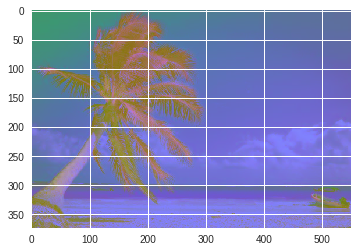

In [94]:
playaLAB = cv2.cvtColor(imagenPlaya,cv2.COLOR_BGR2LAB)
mostrarImagen(playaLAB)

Construye una máscara para quedarte con la esquina superior izquierda de la imagen, es decir del punto (0,0), al centro de la imagen.

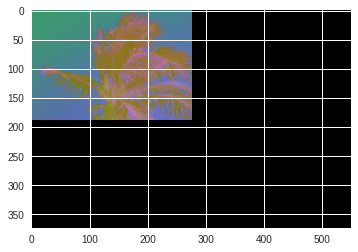

In [105]:
mask2 = np.zeros(imagenPlaya.shape[:2], dtype="uint8")
cv2.rectangle(mask2,(0, 0), (275, 187), 255, -1)
masked = cv2.bitwise_and(playaLAB, playaLAB, mask=mask2)
mostrarImagen(masked)

Construye el histograma de dicha imagen utilizando 4 bins en cada dirección,
y teniendo en cuenta que los rangos para los distintos canales son los mismos
que para los canales RGB.

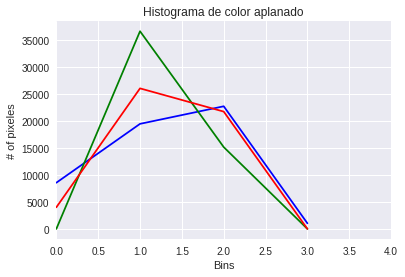

In [109]:
canales = cv2.split(playaLAB)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma de color aplanado")
plt.xlabel("Bins")
plt.ylabel("# of pixeles")

# loop over the image channels
for (canal, color) in zip(canales, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([canal], [0], mask2, [4], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 4])

plt.show()

Normaliza y aplana dicho histograma. Salva el resultado en la variable `histPlayaLAB`.

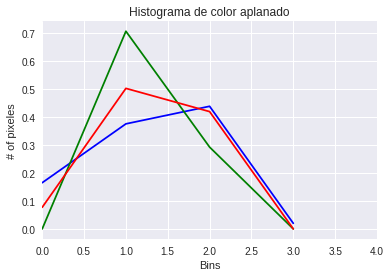

In [110]:
canales = cv2.split(playaLAB)
colors = ("b", "g", "r")
plt.figure()
plt.title("Histograma de color aplanado")
plt.xlabel("Bins")
plt.ylabel("# of pixeles")

# loop over the image channels
for (canal, color) in zip(canales, colors):
    # create a histogram for the current channel and plot it
    hist = cv2.calcHist([canal], [0], mask2, [4], [0, 256])
    histNorm = hist/hist.sum()
    plt.plot(histNorm, color=color)
    plt.xlim([0, 4])

plt.show()